In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#  Question 2   

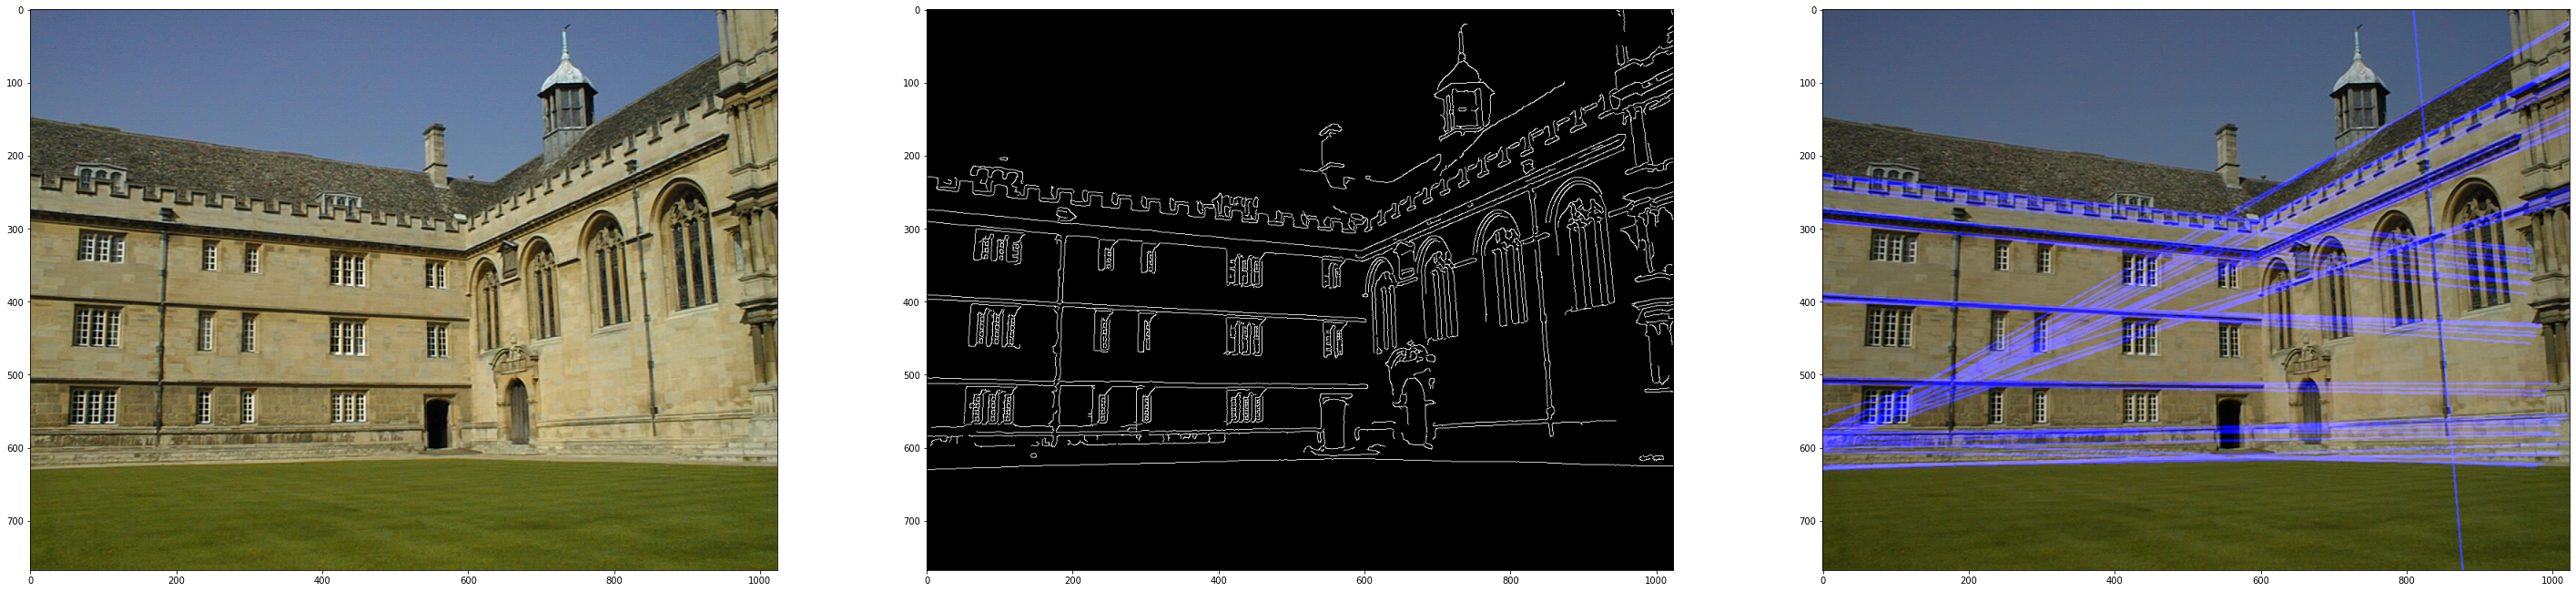

In [9]:

import matplotlib.image as mpimg

image1 = mpimg.imread("ukflag.png") 
image = mpimg.imread("003.jpg")


gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0)
edges_image = cv.Canny(blurred_image, 50, 120)
   
rho_resolution = 1.0
theta_resolution = np.pi/180
threshold = 155

 
def draw_lines(img, houghLines, color=[0, 0, 255], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1.1, λ=0.):
    return cv.addWeighted(initial_img, α, img, β, λ)

hough_lines = cv.HoughLines(edges_image, rho_resolution , theta_resolution , threshold,10,50)
 
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)

plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()

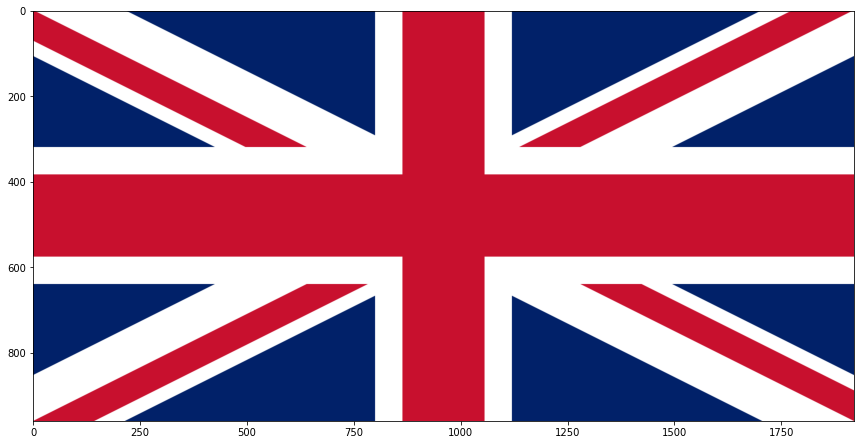

In [3]:
image1 = mpimg.imread("ukflag.png")
plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image1)
plt.show()

In [48]:
# This code is to take the cordinates of the point where we want to warp the Uk Flag
import cv2

def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN: #Left Mouse button Checker
        print(x, ' ', y) #Cordinate Displaying
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img) #Image will open in a new window
   
    if event==cv2.EVENT_RBUTTONDOWN: #Right Mouse button Checker
        print(x, ' ', y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
#Main Funtion
if __name__=="__main__":
    img = cv2.imread('003.jpg', 1)#Reading Image
    cv2.imshow('image', img) #Display Image
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

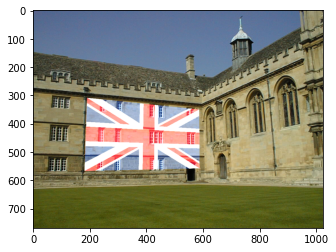

In [49]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from numpy.linalg import svd as svd
from numpy.linalg import norm as norm
from numpy.linalg import inv as inv
from numpy.linalg import det as det
from numpy.linalg import pinv as pinv
from datetime import datetime

img = cv.imread('ukflag.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
background = cv.imread('003.jpg')
background = cv.cvtColor(background,cv.COLOR_BGR2RGB)

rows,cols,ch = background.shape

pts1 = np.float32([[0,0],[1535,0],[0,790],[1535,790]]) # Cordinates of UK Flag
pts2 = np.float32([[191,309],[520, 343],[183,520],[520,520]]) # Fitting Cordinates

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(img,M,(cols,rows))

overlay = cv.add(background, dst)

plt.imshow(overlay)
plt.show()

# Question 3

# Part a

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from numpy.linalg import svd as svd
from numpy.linalg import norm as norm
from numpy.linalg import inv as inv
from numpy.linalg import det as det
from numpy.linalg import pinv as pinv
from datetime import datetime


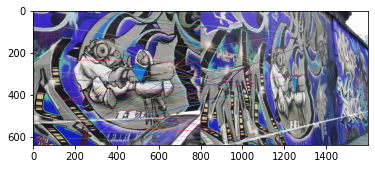

In [5]:
#Question 3
#part a

 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img5.ppm') 

img1 = cv.cvtColor(img1, cv.IMREAD_COLOR)#COLOR_BGR2GRAY
img2 = cv.cvtColor(img2, cv.IMREAD_COLOR)

#sift
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.show()

# Part b

Shape of Image  (640, 800, 3)


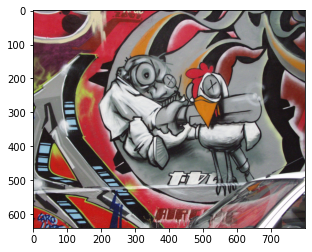

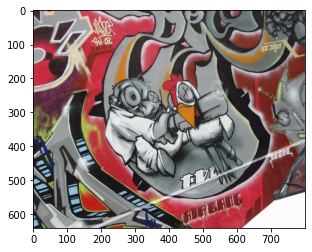

In [9]:
im1=cv.imread("img1.ppm")
print("Shape of Image ",im1.shape)
plt.imshow(im1[:,:,::-1])
plt.figure()
im2=cv.imread("img2.ppm")
plt.imshow(im2[:,:,::-1])
images=[im1,im2]

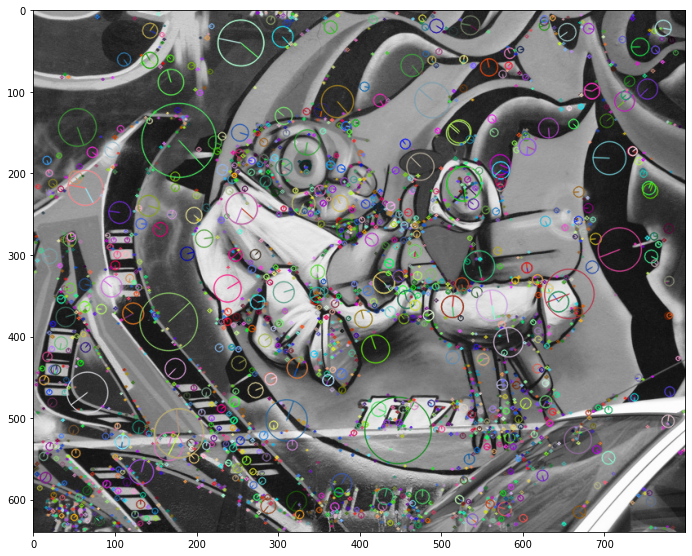

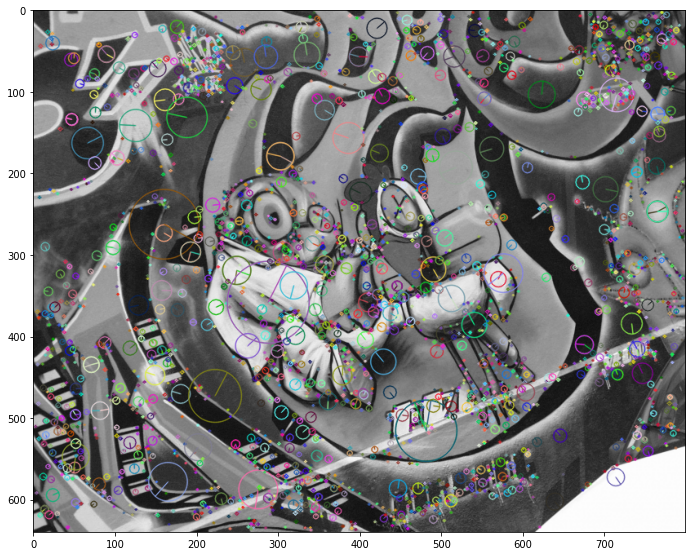

In [15]:
keypoints=[]
descriptions=[]
for im in images:
    gray=cv.cvtColor(im,cv.COLOR_RGB2GRAY)
    sift=cv.xfeatures2d.SIFT_create()
    kp,des=sift.detectAndCompute(gray,None)
    keypoints.append(kp)
    descriptions.append(des)
    plt.figure(figsize=(6*2,4.8*2))
    out=cv.drawKeypoints(gray,kp,gray,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(out)

Number of Matches 1360


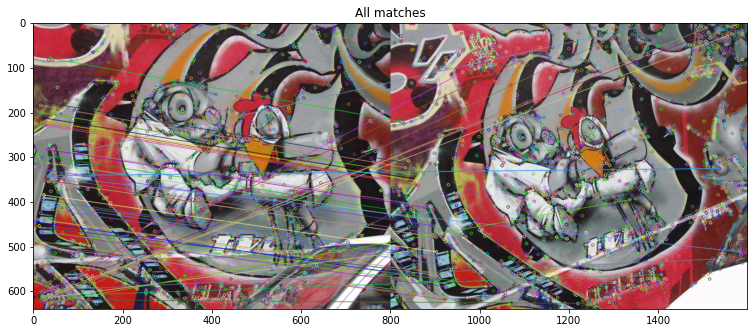

In [34]:
bf=cv.BFMatcher(crossCheck=True)
matches= bf.match(descriptions[0],descriptions[1])
print("Number of Matches",len(matches))
matched_image=cv.drawMatches(images[0][:,:,::-1],keypoints[0],images[1][:,:,::-1],keypoints[1],matches[:50],None)
plt.figure(figsize=(6.4*2,4.8*2))
plt.title("All matches")
plt.imshow(matched_image)
plt.show()

# Part c

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


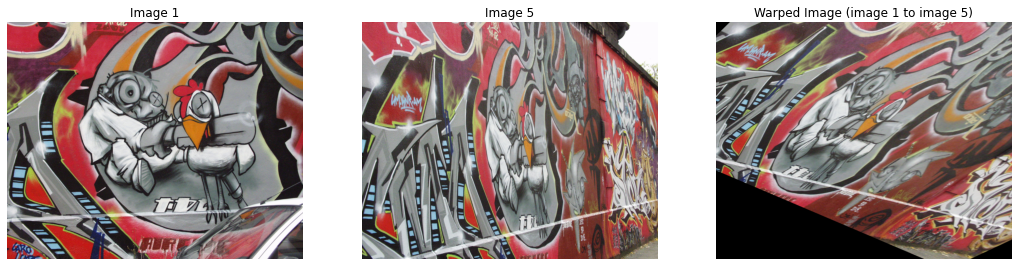

In [17]:
import cv2 as cv
import numpy as np
im1=cv.imread("img1.ppm",cv.IMREAD_ANYCOLOR)
im5=cv.imread("img5.ppm",cv.IMREAD_ANYCOLOR)
H = []
with open(r'H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])
im1to5 = cv.warpPerspective(im5, np.linalg.inv(H), (2000, 2000))
print(H)
fog, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(im5, cv.COLOR_BGR2RGB))
ax[1].set_title("Image 5")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(im1to5[:800, :1000], cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image (image 1 to image 5)")
ax[2].axis("off")
plt.show()